# Konkobo Ulrich Arthur p2513439 & PELLOIS Guillaume p2102360 & Issoumaila Fomba p2512887

In [1]:
from utils import *

# I - Apprentissage supervisé : Feature engineering et Classification
## 1 - Chargement des données et préparation

In [2]:
data_all = pd.read_csv("credit_scoring.csv", sep=";")
data = data_all.drop("Status", axis=1)
target = data_all.Status

print("(Nombre de ligne, Nombre de colonne)",data_all.shape)
print("Pourcentage d'exemple positifs :",target.sum()/target.shape[0])
print("Pourcentage d'exemple négatifs :",1-target.sum()/target.shape[0])

(Nombre de ligne, Nombre de colonne) (4375, 14)
Pourcentage d'exemple positifs : 0.7220571428571428
Pourcentage d'exemple négatifs : 0.27794285714285716


## 2 - Apprentissage et évaluation de modèles

Score for MLP is:	0.747
Score for KNN is:	0.748
Score for DT is:	0.773


[('MLP', 0.7467707207328542),
 ('KNN', 0.7479170954554444),
 ('DT', 0.7732827780834561)]

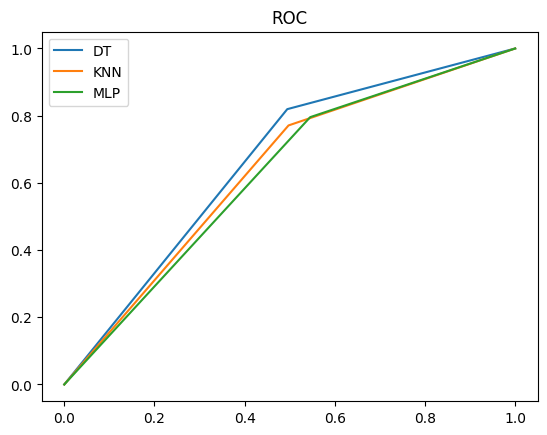

In [3]:
clfs = {"DT": DecisionTreeClassifier(random_state=1),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "MLP": MLPClassifier(hidden_layer_sizes=[40, 20], random_state=1)
        }

[(x[0], x[1]["score"]) for x in run_classifiers_train_test(clfs, train_test, data, target)]

**Le plus interessant ici est le k-plus-proches-voisins par rapport
au critère de l'accuracy et de la précision**

## 3 - Normalisation des variables continues

Score for DT is:	0.768
Score for KNN is:	0.779
Score for MLP is:	0.808


[('DT', 0.7681544133841542),
 ('KNN', 0.7791218979676772),
 ('MLP', 0.8075491040690832)]

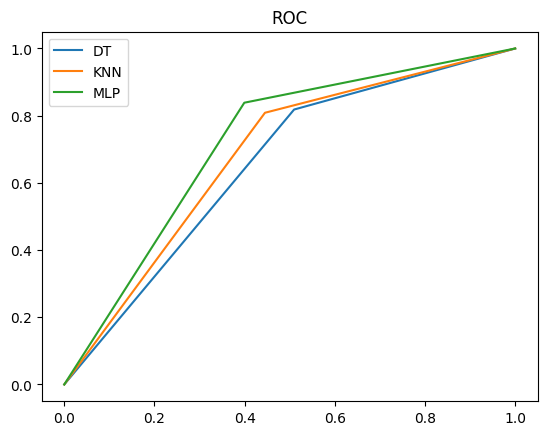

In [4]:
[(x[0], x[1]["score"]) for x in run_classifiers_train_test(clfs, norm_train_test, data, target)]

**Le meilleur algo est le MultilayerPerceptron après normalisation 
l'accuracy et la précision est meilleur qu'avant.**


## 4 - Création de nouvelles variables caractéristiques par combinaisons linéaires des variables initiales

Score for MLP is:	0.747
Score for KNN is:	0.748
Score for DT is:	0.772


[('MLP', 0.7473338282579522),
 ('KNN', 0.7479170954554444),
 ('DT', 0.7718470286569007)]

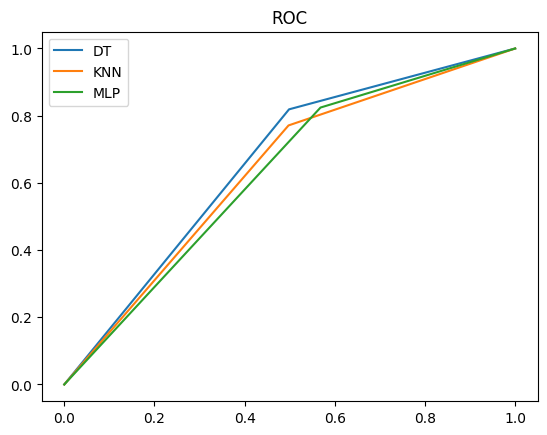

In [5]:
[(x[0], x[1]["score"]) for x in run_classifiers_train_test(clfs, xt_train_test, data, target)]

**Le meilleur algo pour sur le critère de l'accuracy est le MultilayerPerceptron
sur les données normalisées avec ajout de variables issues de combinaison linéaire
il faut mieux normaliser et faire l'ACP pour obtenir une meilleure accuracy et une meilleure précision**

## 5 - Sélection de variables

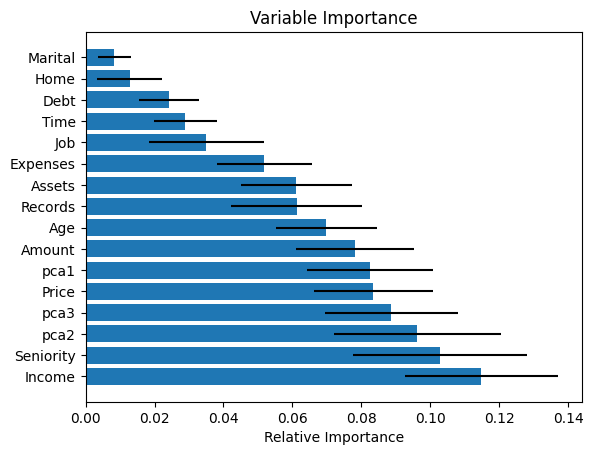

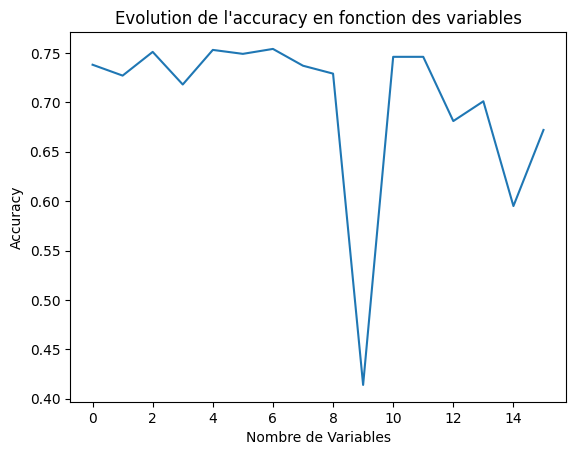

Les 6 premieres variables donnent le meilleur score: Index(['Income', 'Seniority', 'pca2', 'pca3', 'Price', 'pca1'], dtype='object')


(Index(['Income', 'Seniority', 'pca2', 'pca3', 'Price', 'pca1', 'Amount', 'Age',
        'Records', 'Assets', 'Expenses', 'Job', 'Time', 'Debt', 'Home',
        'Marital'],
       dtype='object'),
 np.int64(6))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, target, train_size=.5, random_state=1)
get_best_vars(clfs["MLP"], X_train, y_train, X_test, y_test)

<Figure size 640x480 with 0 Axes>

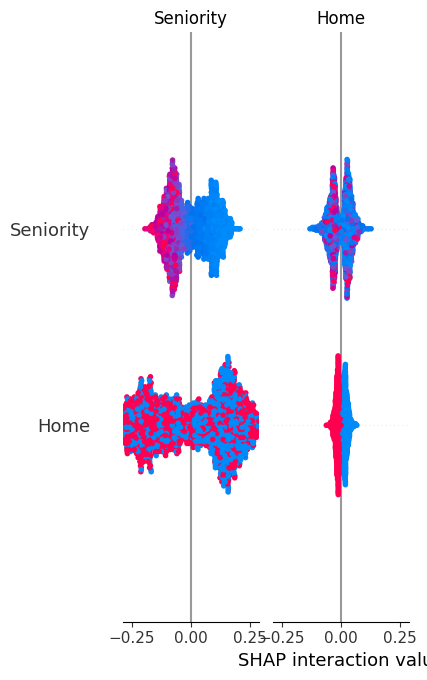

In [7]:
shap_explain(X_train, y_train, X_test, y_test)

## 6 - Paramétrage des classifieurs

In [8]:
get_best_params(clfs["MLP"], data, target)

{'hidden_layer_sizes': [46, 26]}

## 7 - Création d’un pipeline

In [9]:
Q7_pipeline(data, target)

,steps,"[('standardscaler', ...), ('pca', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_components,3
,copy,True
,whiten,False
,svd_solver,'auto'


## 8 - Orchestration 

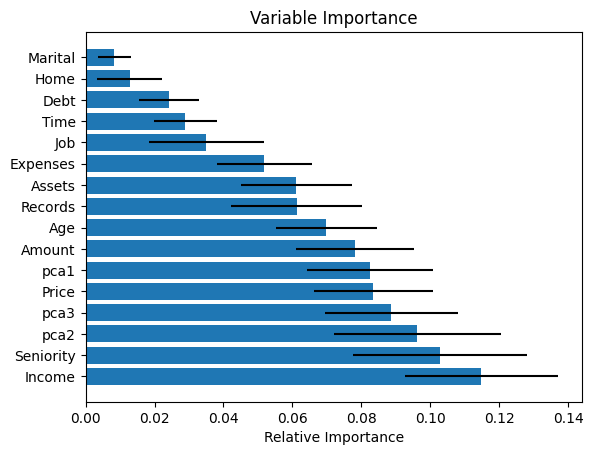

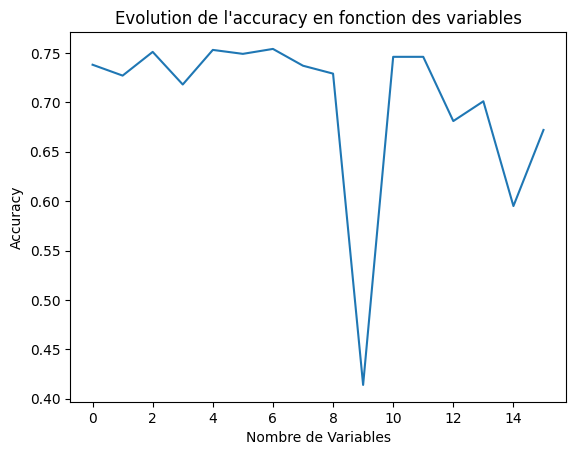

Les 6 premieres variables donnent le meilleur score: Index(['Income', 'Seniority', 'pca2', 'pca3', 'Price', 'pca1'], dtype='object')


,steps,"[('standardscaler', ...), ('pca', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_components,3
,copy,True
,whiten,False
,svd_solver,'auto'


In [10]:
pipeline_generation_train_test_split(clfs, data, target)

## 9 - Création d’une API FastAPI 
voir [api.py](./api.py)

## 10 - Comparaison de plusieurs algorithmes d’apprentissage

In [11]:
clfs = {
    'NBS' : GaussianNB(),
    'CART' : DecisionTreeClassifier(criterion='gini', random_state=1),
    'ID3' : DecisionTreeClassifier(criterion='entropy', random_state=1),
    'DS' : DecisionTreeClassifier(random_state=1), # TODO: pas ca
    'MP20' : MLPClassifier(hidden_layer_sizes=[20, 10], random_state=1),
    'KNN': KNeighborsClassifier(n_neighbors=10),
    'BG' : BaggingClassifier(n_estimators=200, random_state=1),
    'AB' : AdaBoostClassifier(n_estimators=200, random_state=1),
    'RF': RandomForestClassifier(n_estimators=200, random_state=1),
    'XGB' : GradientBoostingClassifier(n_estimators=100, random_state=1)
}

pipeline_generation_cv(clfs, data, target)

Donnees brutes
Accuracy for NBS is:	0.772 +/- 0.022
Accuracy for CART is:	0.727 +/- 0.025
Accuracy for ID3 is:	0.723 +/- 0.024
Accuracy for DS is:	0.727 +/- 0.025
Accuracy for MP20 is:	0.703 +/- 0.078
Accuracy for KNN is:	0.732 +/- 0.016
Accuracy for BG is:	0.782 +/- 0.015
Accuracy for AB is:	0.796 +/- 0.015
Accuracy for RF is:	0.786 +/- 0.015
Accuracy for XGB is:	0.793 +/- 0.015
Donnees normalisees
Accuracy for NBS is:	0.768 +/- 0.019
Accuracy for CART is:	0.727 +/- 0.025
Accuracy for ID3 is:	0.723 +/- 0.024
Accuracy for DS is:	0.727 +/- 0.025
Accuracy for MP20 is:	0.787 +/- 0.017
Accuracy for KNN is:	0.764 +/- 0.019
Accuracy for BG is:	0.781 +/- 0.016
Accuracy for AB is:	0.796 +/- 0.015
Accuracy for RF is:	0.784 +/- 0.014
Accuracy for XGB is:	0.793 +/- 0.015
Donnees normalisees + nouvelles variables
Accuracy for NBS is:	0.746 +/- 0.025
Accuracy for CART is:	0.724 +/- 0.018
Accuracy for ID3 is:	0.723 +/- 0.019
Accuracy for DS is:	0.724 +/- 0.018
Accuracy for MP20 is:	0.708 +/- 0.069
A

# II - Apprentissage supervisé : Données hétérogènes
# 1 - Variables continues

In [12]:
# Chargement des données et préparation :
data = pd.read_csv("credit.data", sep="\t", header=None, na_values="?")
data_status = (data[15] == "+").astype(float)

data_nona = data.dropna()
data_nona_num_other = data_nona.select_dtypes([float, int]).astype(float)
data_nona_status = (data_nona[15] == "+").astype(float)# Sans les données manquantes, en float

# Normalisation des variables continues :

data_nona_num_other_n = pd.DataFrame(data=StandardScaler().fit_transform(data_nona_num_other), columns=data_nona_num_other.columns)

run_classifiers_cv(clfs, data_nona_num_other_n, data_nona_status)

Accuracy for NBS is:	0.715 +/- 0.045
Accuracy for CART is:	0.740 +/- 0.051
Accuracy for ID3 is:	0.704 +/- 0.052
Accuracy for DS is:	0.740 +/- 0.051
Accuracy for MP20 is:	0.776 +/- 0.053
Accuracy for KNN is:	0.727 +/- 0.061
Accuracy for BG is:	0.775 +/- 0.065
Accuracy for AB is:	0.796 +/- 0.057
Accuracy for RF is:	0.778 +/- 0.071
Accuracy for XGB is:	0.795 +/- 0.048


## 2 - Traitement de données manquantes

In [13]:
# inputer sur les variables numeriques (tout le dataset)
data_num_other = data.select_dtypes([float, int]).astype(float)
data_num_other_imp = SimpleImputer(strategy='mean').fit_transform(data_num_other)

# inputer sur les variables categorie et transfo en variables bianires
data_cat_other = data.select_dtypes(exclude=[float, int]).drop(15, axis=1).astype("category").apply(lambda x: x.cat.codes)
data_cat_other_imp = SimpleImputer(strategy='most_frequent').fit_transform(data_cat_other)

data_cat_other_imp_bin = OneHotEncoder().fit_transform(data_cat_other_imp).toarray()

data_other_imp = np.concatenate([data_num_other_imp, data_cat_other_imp_bin], axis=1)

run_classifiers_cv(clfs, StandardScaler().fit_transform(data_other_imp), data_status)

Accuracy for NBS is:	0.693 +/- 0.046
Accuracy for CART is:	0.810 +/- 0.058
Accuracy for ID3 is:	0.812 +/- 0.038
Accuracy for DS is:	0.810 +/- 0.058
Accuracy for MP20 is:	0.857 +/- 0.043
Accuracy for KNN is:	0.823 +/- 0.051
Accuracy for BG is:	0.876 +/- 0.038
Accuracy for AB is:	0.858 +/- 0.039
Accuracy for RF is:	0.874 +/- 0.039
Accuracy for XGB is:	0.853 +/- 0.033
